In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Data Processing


In [3]:
df = pd.read_csv('data-week-3.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns = df.columns.str.lower().str.replace(" ","_")

categorical_columns = list(df.dtypes[df.dtypes == object].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")
    
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [5]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [6]:
df.totalcharges = df.totalcharges.fillna(0)

In [7]:
df.churn = (df.churn == "yes").astype(int)

In [8]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


#### Setting up Validation Framework

Using sklearn to to perform train/test/val split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df_full_train,df_test = train_test_split(df,test_size=0.2,random_state=1)

In [11]:
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [12]:
len(df_full_train),len(df_val),len(df_test)

(5634, 1409, 1409)

In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [15]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

#### EDA

In [16]:
df_full_train = df_full_train.reset_index(drop=True)

In [17]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [18]:
# distribution of target variable
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [19]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [20]:
numerical = ['tenure','monthlycharges','totalcharges']

In [21]:
categorical_columns = [column for column in df_full_train.columns if column not in numerical + ['churn','customerid']]
categorical_columns

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [22]:
df_full_train[categorical_columns].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

#### **Feature Importance (Risk Ratio / Churn rate)**

Churn Rate

In [23]:
# female churn rate
churn_female = df_full_train[df_full_train.gender == "female"].churn.mean()
churn_female

0.27682403433476394

In [24]:
#male churn rate
churn_male = df_full_train[df_full_train.gender == "male"].churn.mean()
churn_male

0.2632135306553911

In [25]:
global_churn_rate = df_full_train.churn.mean()
global_churn_rate

0.26996805111821087

In [26]:
churn_yes_partner = df_full_train[df_full_train.partner == "yes"].churn.mean()
churn_yes_partner

0.20503330866025166

In [27]:
churn_no_partner = df_full_train[df_full_train.partner == "no"].churn.mean()
churn_no_partner


0.3298090040927694

In [28]:
from IPython.display import display

In [29]:
for c in categorical_columns:
    print(c) 
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980



seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208



partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472



dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651



phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412



multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948



internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201



onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570



onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660



deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480



techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390



streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328



streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182



contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730



paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560



paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


#### **Feature Importance (Mutual information)**

In [30]:
from sklearn.metrics import mutual_info_score

In [31]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.09832038740415643

In [32]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [33]:
mi = df_full_train[categorical_columns].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

#### **Feature Importance (Correlation)**

In [34]:
# most important numerical variable 
df_full_train[numerical].corrwith(df_full_train.churn).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

In [35]:
# less than 2 months
df_full_train[df_full_train.tenure <= 2].churn.mean()

0.5953420669577875

In [36]:
# subscribers for less than one year
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [37]:
#churn rate for  more than a year
df_full_train[df_full_train.tenure > 12].churn.mean()

0.17634908339788277

#### **Onehot Enconding**

In [38]:
from sklearn.feature_extraction import DictVectorizer

In [39]:
train_dicts = df_train[categorical_columns + numerical].to_dict(orient = 'records')

In [40]:
dv = DictVectorizer(sparse=False)

In [41]:
X_train = dv.fit_transform(train_dicts)

In [42]:
val_dicts = df_val[categorical_columns + numerical].to_dict(orient = 'records')

In [43]:
X_val = dv.transform(val_dicts)

#### **Logistic Regression**

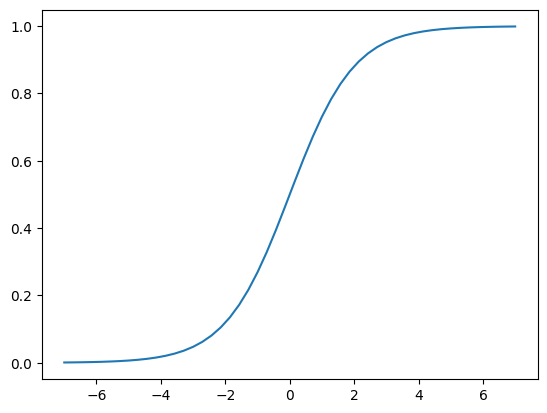

In [44]:
# sigmoid function for logistic regression
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

z = np.linspace(-7,7,50)
plt.plot(z,sigmoid(z))

In [45]:
# training logistic regression model with sklearn
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression()
model.fit(X_train,y_train)

/home/ksilas/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
model.intercept_[0]

-0.10902853603693266

In [48]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.123, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

In [49]:
# hard prediction
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [50]:
# soft prediction
y_pred = model.predict_proba(X_val)[:,1]

In [51]:
churn_decision = (y_pred >= 0.5)

In [52]:
# accuracy for our model 
# churn_decision.astype(int) 
(y_val == churn_decision).mean()

0.8034066713981547

In [53]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

df_pred['correct'] = df_pred['prediction'] == df_pred['actual']
df_pred

,probability,prediction,actual,correct
0,0.008999,0,0,True
1,0.204549,0,0,True
2,0.212243,0,0,True
3,0.543078,1,1,True
4,0.213802,0,0,True
...,...,...,...,...
1404,0.313700,0,0,True
1405,0.039367,0,1,False
1406,0.136416,0,0,True
1407,0.799788,1,1,True


In [54]:
df_pred.correct.mean()

0.8034066713981547

#### **Model Interpretation**

In [ ]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

In [56]:
# train a smaller model 

small = ['contract','tenure','monthlycharges']

In [57]:
dict_train_small = df_train[small].to_dict(orient = 'records')
dict_val_small = df_val[small].to_dict(orient = 'records')

In [58]:
dv_small = DictVectorizer(sparse= False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [59]:
X_train_small = dv_small.transform(dict_train_small)

In [60]:
model_small = LogisticRegression()
model_small.fit(X_train_small,y_train)

LogisticRegression()

In [61]:
w0 = model_small.intercept_[0]
w0

-2.477957596375836

In [62]:
w = model_small.coef_[0]
w.round(3)

array([ 0.971, -0.024, -0.948,  0.027, -0.036])

In [63]:
weights = dict(zip(dv_small.get_feature_names_out(), model_small.coef_[0].round(3)))
weights

{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [64]:
dicts_full_train = df_full_train[categorical_columns + numerical].to_dict(orient ='records')

In [65]:
y_full_train = df_full_train.churn.values

In [66]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [67]:
model = LogisticRegression().fit(X_full_train,y_full_train)

/home/ksilas/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:
dicts_test = df_test[categorical_columns + numerical].to_dict(orient ='records')

In [69]:
X_test = dv.transform(dicts_test)

In [70]:
y_pred = model.predict_proba(X_test)[:,1]

In [71]:
churn_decision = (y_pred >= 0.5)

In [72]:
(churn_decision == y_test).mean()

0.8119233498935415